In [1]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import mglearn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
color = ["red", "blue", "green"]
# プロットするようの関数
def plot(X,y,y2):
    fig, (axx,axy) = plt.subplots(ncols=2,figsize=(10,5))

    for i in range(X.shape[0]):
        axx.scatter(X[i,0], X[i,1], c=color[y[i]], s=100)
        axx.set_title("answer")

    for i in range(X.shape[0]):
        axy.scatter(X[i,0], X[i,1], c=color[int(y2[i])], s =100)
        axy.set_title("predict")

# うまくラベルを変えるクソクソ関数
def trans(y, a ,b):
    z= np.zeros(len(y))
    for i in range(len(y)):
        if y[i]==a:
            z[i] = 0
        elif y[i] ==b:
            z[i] = 1
        else:
            z[i] = 2
    return z

In [3]:
color = ["red", "blue", "green"]
wine = load_wine()
X = wine.data
y = wine.target
wine_dataframe = pd.DataFrame(X, columns=wine.feature_names)
# スケール処理
scaler = MinMaxScaler()
scaler.fit(X)
Xs = scaler.transform(X)
wdfs = pd.DataFrame(Xs, columns=wine.feature_names)

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 0)

wine_dataframe.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


# 特徴の強さを見てみる

In [4]:
def plot_feature_importances_wine(model):
    n_features = wine.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), wine.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

0.9924812030075187
0.9777777777777777


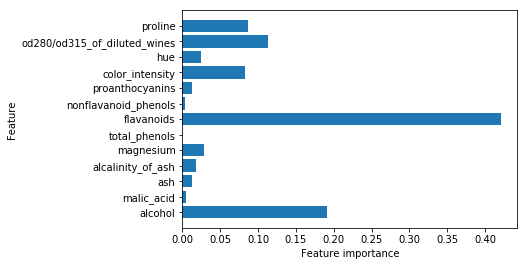

In [5]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 5, random_state = 0)
forest.fit(X_train, y_train)
print(forest.score(X_train, y_train))
print(forest.score(X_test, y_test))
plot_feature_importances_wine(forest)

0.9555555555555556


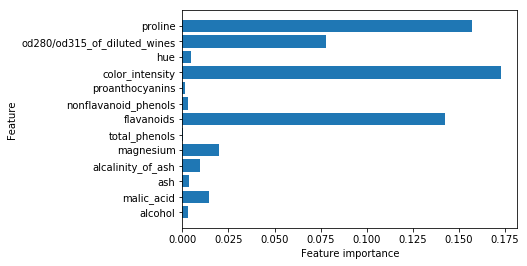

In [6]:
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier(random_state = 0).fit(X_train,y_train)
print(gbrt.score(X_test,y_test))
plot_feature_importances_wine(gbrt)

# 特徴を抽出する

In [7]:
# two features
X2 = wine_dataframe[['flavanoids', 'alcohol']].values
# three features
X3 = wine_dataframe[['flavanoids', 'alcohol', 'od280/od315_of_diluted_wines']].values
# four features
X4 = wine_dataframe[['flavanoids', 'alcohol', 'od280/od315_of_diluted_wines','total_phenols']].values

In [8]:


# two features and scaling
X2s = wdfs[['flavanoids', 'alcohol']].values
# three features and scaling
X3s = wdfs[['flavanoids', 'alcohol', 'od280/od315_of_diluted_wines']].values
# fourfeatures and scaling
X4s = wdfs[['flavanoids', 'alcohol', 'od280/od315_of_diluted_wines','proline']].values

# いらん特徴量を消す

In [9]:
# delete three features
Xds = wdfs.drop(['total_phenols','malic_acid','nonflavanoid_phenols'],axis = 1).values
# delete four features
X2ds = wdfs.drop(['total_phenols','malic_acid','nonflavanoid_phenols','hue'],axis = 1).values

# 脳死

In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import f1_score
kmeans = KMeans(n_clusters = 3, random_state= 0)
kmeans.fit(X)
y_pred = kmeans.labels_
yy = trans(y_pred, 1, 2)
f1_score(y, yy, average='weighted')
#print(y)
#print(y_pred)

0.7147804707482469

# ランダムフォレストで特徴を選択

In [11]:
#特徴2個
kmeans.fit(X2)
y_pred2 = kmeans.labels_
yy2 = trans(y_pred2,2,1)
f1_score(y, yy2, average='weighted')
#print(yy)
#print(y_pred2)

0.8908680947058245

In [12]:
# 特徴3個
kmeans.fit(X3)
y_pred3 = kmeans.labels_
yy3 = trans(y_pred3,2,1)
f1_score(y, yy3, average='weighted')
#print(y_pred3)
#print(y)

0.8965408208706888

In [13]:
# 特徴4個
kmeans.fit(X4)
y_pred4 = kmeans.labels_
yy4 = trans(y_pred4,2,0)
f1_score(y, yy4, average='weighted')
#print(y_pred4)
#print(y)

0.879493945026334

# k=2のときのデータ可視化

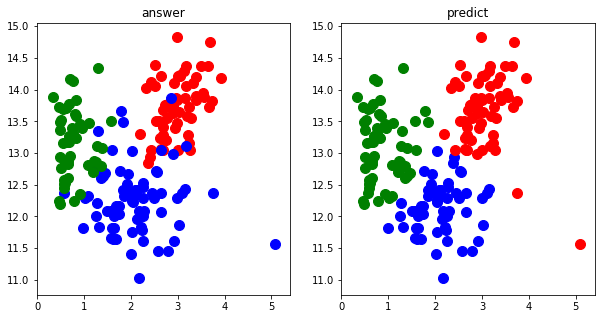

In [14]:
plot(X2,y,yy2)

# スケール処理(MinMaxScaler)

In [15]:
kmeans.fit(X2s)
y_pred2s = kmeans.labels_
yy2s = trans(y_pred2s,1,0)
f1_score(y, yy2s, average='weighted')
#print(y_pred2s)
#print(y)

0.897372425093633

In [16]:
kmeans.fit(X3s)
y_pred3s = kmeans.labels_
yy3s = trans(y_pred3s,2,1)
f1_score(y, yy3s, average='weighted')
#print(yy)
#print(y_pred3s)

0.9140121054885851

In [17]:
kmeans.fit(X4s)
y_pred4s = kmeans.labels_
yy4s = trans(y_pred4s, 1 ,0)
f1_score(y,yy4s,average='weighted')
#y_pred4s

0.927046036460992

# 一応PCAとかもいじってみよう

0.9487983402111327

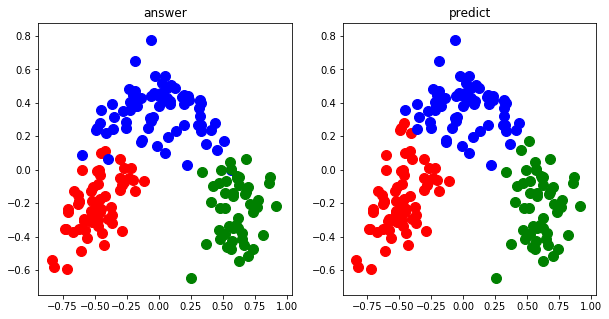

In [18]:
from sklearn.decomposition import PCA
pca  = PCA(n_components = 2).fit(Xs)
X_pca = pca.transform(Xs)
kmeans.fit(X_pca)
y_predp = kmeans.labels_
yyp = trans(y_predp, 2,1)
plot(X_pca,y,yyp)
f1_score(y, yyp, average='weighted')

# PCA強すぎじゃね、いらん特徴消しますた

## 特徴3つ消した

total_phenols, malic_acid, nonflavanoid_phenols

0.9547996139592848

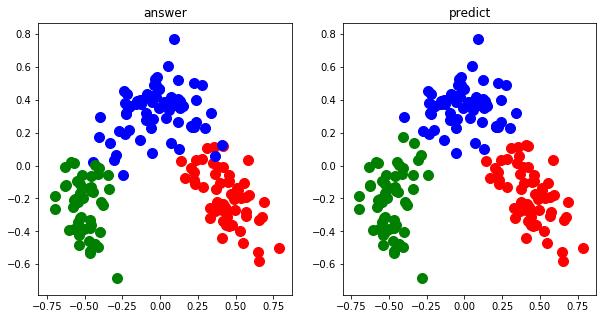

In [22]:
pca = PCA(n_components=2).fit(Xds)
X_pca2 = pca.transform(Xds)
kmeans.fit(X_pca2)
y_pred2p = kmeans.labels_
yy2p = trans(y_pred2p, 1,0)
plot(X_pca2, y ,yy2p)
f1_score(y, yy2p, average='weighted')

## 特徴4つ消した
total_phenols, malic_acid, nonflavanoid_phenols, ash

0.9604435256259708

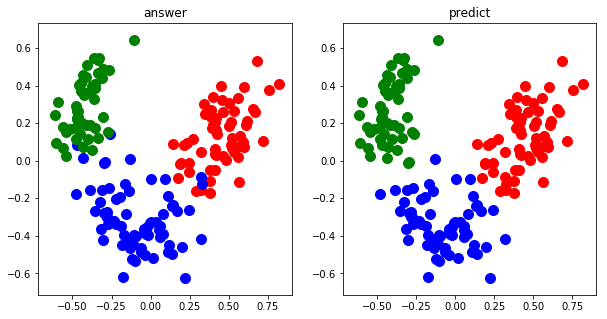

In [23]:
pca = PCA(n_components=2).fit(X2ds)
X_pca3 = pca.transform(X2ds)
kmeans.fit(X_pca3)
y_pred3p = kmeans.labels_
yy3p = trans(y_pred3p, 2,1)
plot(X_pca3, y ,yy3p)
f1_score(y, yy3p, average='weighted')

# TSNEが一番つおい(難しい)

0.9718705663188756

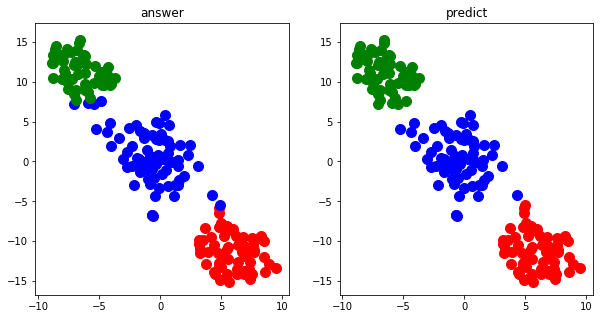

In [42]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state = 0)
X_tsne = tsne.fit_transform(X2ds)
kmeans.fit(X_tsne)
y_pred_tsne = kmeans.labels_
yy_tsne = trans(y_pred_tsne, 1,2)
plot(X_tsne, y, yy_tsne)
f1_score(y, yy_tsne,average='weighted')